# Files, exceptional handling, logging and memory management Questions

1. **What is the difference between interpreted and compiled languages?**

    Difference between Compiled and Interpreted Languages are

    * **Compiled**
        * Translated into machine code before running.
        * Faster because machine code runs directly.
        * Machine-dependent (need recompilation on different systems).
        * Errors shown after full compilation
        * Examples :- C, C++, Go, Rust

    * **Interpreted**
        * Translated line by line during execution.
        * Slower due to line-by-line interpretation.
        * More portable (same code can run on any system with interpreter).
        * Errors shown immediately at runtime.
        * Examples :- Python, Ruby


2. **What is exception handling in Python?**

    Exception handling in Python is a mechanism to deal with errors that occur during the execution of a program. Instead of stopping the entire program when an error happens, Python allows you to “catch” the error and handle it gracefully. This ensures that the program does not crash and can continue running or provide a meaningful message to the user.

    Python provides **special keywords** for this:

    **try**: the block of code where you write statements that might cause an error.

    **except**: the block that runs if an error occurs in the try block.

    **else**: runs if no error occurs.

    **finally**: always runs, whether there was an error or not (commonly used for cleanup like closing files).

    ```
    try:
        number = int(input("Enter a number: "))
        print("You entered:", number)
    except ValueError:
        print("That’s not a valid number!")
    finally:
        print("Execution finished.")

    ```

3. **What is the purpose of the finally block in exception handling?**

    In Python, the finally block is used to define a section of code that will always execute, no matter what happens in the try or except blocks. Its main purpose is to perform cleanup tasks like closing files, releasing resources, or disconnecting from a database.

    Even if an exception occurs, or if the program executes a return or break statement inside try/except, the finally block will still run before the program exits that block.

    ```
    try:
        file = open("data.txt", "r")
        content = file.read()
        print(content)
    except FileNotFoundError:
        print("File not found!")
    finally:
        print("Closing file...")
        file.close()
    ```

4. **What is logging in Python?**
   
   Logging in Python is the process of recording important messages (like errors, warnings, or information) from a program while it runs. Instead of using print() for debugging, the logging module provides a flexible way to track what’s happening in your code.

    It is mainly used for:

    **Debugging**: finding issues in code.

    **Monitoring**: keeping track of program flow and activities.

    **Error tracking**: recording problems for later analysis.

    **Audit trails**: saving important events in files or systems.

    The logging module allows different log levels, each representing the severity of the message:

    **DEBUG** :- Detailed information (used for debugging).

    **INFO** :- General events (program is running fine).

    **WARNING** :- Something unexpected, but program continues.

    **ERROR** :- A serious problem, program may not work as expected.

    **CRITICAL** :- Very serious error, program may stop running.

    ```
    import logging

    # Configure logging
    logging.basicConfig(level=logging.INFO)

    logging.debug("This is a debug message")   # Won’t show (level is INFO)
    logging.info("Program started")
    logging.warning("Low disk space")
    logging.error("File not found")
    logging.critical("System crash!")

    ```

5. **What is the significance of the __del__ method in Python?**

    In Python, the __del__ method is called a destructor.
    It is a special method that is automatically invoked when an object is about to be destroyed (i.e., when it is no longer in use and garbage collected).

    **Main purposes**
    * To release resources like closing files or network connections.

    * To perform cleanup actions before an object is removed from memory.

    * To help manage resources in classes that use external systems (like databases).


    ```
    class FileHandler:
    def __init__(self, filename):
        self.file = open(filename, "w")
        print("File opened")

    def __del__(self):
        self.file.close()
        print("File closed automatically")

    # Object creation
    obj = FileHandler("test.txt")
    del obj   # Explicitly deleting object
    ```

6. **What is the difference between import and from ... import in Python?**

    * **import statement**
      * Imports the entire module.

      * You must use the module name to access its functions or variables.

      * Keeps namespace cleaner since names don’t directly enter your code’s scope. 

        ```
            import math
            print(math.sqrt(16))   # Access using module name
        ```
    
    * **from ... import statement**
      * Imports specific functions, classes, or variables from a module.
      * You can use them directly without prefixing with the module name.
      * Can clutter the namespace if many names are imported.
      ```
      from math import sqrt
      print(sqrt(16))   # Direct use, no "math."
      ```
 

7.  **How can you handle multiple exceptions in Python?**
   
    When a program may raise different types of errors, you can handle them separately or together.

*  **Multiple except blocks (handle differently)**:- Each exception type is handled with its own block.

            ```
            try:
                x = int("abc")   # ValueError
                y = 10 / 0       # ZeroDivisionError
            except ValueError:
                print("Invalid number!")
            except ZeroDivisionError:
                print("Division by zero is not allowed.")
            ```

*  **Single except with tuple (handle together)** :- You can group exceptions if they require the same handling.
        
            ```
            try:
                x = int("abc")
                y = 10 / 0
            except (ValueError, ZeroDivisionError):
                print("An error occurred!")
            ```

*   **Catch all exceptions (generic handler)** :- Not recommended always, but useful for logging or debugging.
        
            ```
            try:
                num = int("abc")
            except Exception as e:
                print("Error:", e)
            ```
          

8. **What is the purpose of the with statement when handling files in Python?**
   
    The with statement in Python is mainly used to handle resource management in a clean and safe way. When working with files, it ensures that the file is properly closed automatically, even if an error occurs while processing it.

    Normally, when you open a file using open(), you need to remember to call close() at the end. Forgetting this may cause memory leaks or file corruption. The with statement solves this by using a context manager that takes care of setup and cleanup.

    ```
    with open("data.txt", "w") as file:
        file.write("Hello World")
    # File automatically closed here
    ```


9. **What is the difference between multithreading and multiprocessing?**
    
    **multithreading**

    * Runs multiple threads (smaller units of a process) within the same process.
    * Threads share the same memory, lightweight but may cause race conditions.
    * Better for I/O-bound tasks (e.g., file reading, web requests).
    * Affected by Global Interpreter Lock only one thread executes Python bytecode at a time
        ```
        import multiprocessing

        def task():
            print("Running in process")

        p1 = multiprocessing.Process(target=task)
        p1.start()
        p1.join()
        ```

    **Multiprocessing**
    * Runs multiple processes, each with its own memory space.
    * Each process has separate memory, heavier but safer (no shared memory issues).
    * Better for CPU-bound tasks (e.g., heavy calculations, data processing).
    * Not affected by Global Interpreter Lock true parallel execution on multiple CPU cores.
        ```
        import multiprocessing

        def task():
            print("Running in process")

        p1 = multiprocessing.Process(target=task)
        p1.start()
        p1.join()
        ```

10. **What are the advantages of using logging in a program?**

    * **Better than print() for debugging**

        * Logging provides structured information (like timestamps, severity levels), while print() just outputs text.

    * **Different log levels**

        * You can categorize messages as DEBUG, INFO, WARNING, ERROR, or CRITICAL, making it easier to filter and analyze.

    * **Persistent records**

        * Logs can be saved to files for future reference, unlike print() which disappears after the program ends.

    * **Helps in monitoring and troubleshooting**

        * Logs show what happened before an error, making it easier to trace issues in production.

    * **Flexible configuration**

        * You can choose where to send logs: console, files, email, or external monitoring systems.

    * **Useful in large applications**

        * In complex projects, logging provides a professional way to track flow, errors, and performance across modules.

11. **What is memory management in Python?**

    Memory management in Python refers to how Python allocates and frees memory for objects during program execution. It is mostly automatic and handled by the Python Memory Manager.

    * **Automatic Allocation**

        * When you create a variable or object, Python automatically allocates memory for it.

    * **Garbage Collection**

        * Python uses reference counting (keeps track of how many references point to an object).

        * When no references remain, the garbage collector frees the memory.

        * It also handles cyclic references (objects referencing each other).

    * **Private Heap Space**

        * All Python objects and data structures are stored in a private heap, managed internally by the interpreter.

        * Programmers don’t directly access this memory.

    * **Memory Pools (PyMalloc)**

        * For efficiency, Python uses a built-in allocator (PyMalloc) to manage small memory blocks.

    * **Modules for Control**

        * The gc module allows programmers to interact with the garbage collector (e.g., gc.collect()).

12. **What are the basic steps involved in exception handling in Python?**

    Exception handling in Python follows a structured flow using try, except, else, and finally.

    1. **try block**

        Place the code that may raise an error inside try.

    2. **except block**

        If an error occurs in try, control jumps here.

        You can handle specific exceptions (like ValueError, ZeroDivisionError) or use a generic one.

    3. **else block (optional)**

        Runs only if no exception occurs in the try block.

    4. **finally block (optional**)

        Runs always, whether an exception occurs or not.

        Used for cleanup (e.g., closing files, releasing resources).

        ```
        try:
            x = int(input("Enter a number: "))
            result = 10 / x
        except ValueError:
            print("Invalid number!")
        except ZeroDivisionError:
            print("Cannot divide by zero!")
        else:
            print("Result is:", result)
        finally:
            print("Program ended.")
        ```

13. **Why is memory management important in Python?**

    1. **Efficient Resource Use**

        Memory (RAM) is limited. Proper management ensures Python programs use only what they need, preventing wastage.

    2. **Program Stability**

        Poor memory handling can cause crashes, slow performance, or “memory leaks.”

        Python’s automatic garbage collection helps keep programs stable.

    3. **Performance Optimization**

        Releasing unused objects quickly frees memory for new ones, improving execution speed.

    4. **Automatic Handling for Developers**

        Unlike languages like C where developers manually allocate/free memory, Python’s memory manager + garbage collector simplify coding.

    5. **Support for Large Applications**

        In data-heavy fields (machine learning, web apps, databases), efficient memory management is crucial to handle big datasets smoothly.

14. **What is the role of try and except in exception handling?**

    * **try block**

        * The try block contains the code that might raise an exception.

        * If no error occurs, the except block is skipped.

        * If an error does occur, Python immediately jumps out of try and looks for a matching except.

    * **except block**

        * The except block defines how to handle the error.

        * It prevents the program from crashing by providing an alternative action.

        * You can catch specific exceptions (e.g., ValueError, ZeroDivisionError) or a generic Exception.

    ```
    try:
        x = int("abc")   # This will cause ValueError
    except ValueError:
        print("Invalid input! Please enter a number.")
    ```

15. **How does Python's garbage collection system work?**

    Garbage collection (GC) in Python is the process of automatically freeing memory by removing objects that are no longer in use. This helps prevent memory leaks and ensures efficient resource usage.

    **Main Mechanisms**
    1. **Reference Counting**
        * Every object in Python has a counter that tracks how many references point to it.
        * When the count drops to zero, the memory is freed.
        ```
        import sys
        a = [1, 2, 3]
        b = a
        print(sys.getrefcount(a))  # Shows reference count
        del b
        del a   # Now object has 0 references → collected
        ```
    2. **Garbage Collector for Cyclic References**
        * Sometimes objects reference each other (cycles), so reference count never reaches zero.
        * Python’s cyclic garbage collector (in gc module) detects and cleans up these cycles.

    3. **Generational GC**
        * Objects are divided into generations (0, 1, 2) based on their lifespan.
        * Younger objects (like temporary variables) are collected more often.
        * Older objects (used for a long time) are collected less frequently, improving performance.


16. **What is the purpose of the else block in exception handling?**

    In Python, the else block in exception handling is used to define code that should run only if no exception occurs in the try block.

    * If the try block executes successfully → the else block runs.

    * If an exception occurs → the else block is skipped, and the except block handles the error.

    * It is useful to separate error-handling code from the normal execution flow.

    ```
    try:
        num = int(input("Enter a number: "))
    except ValueError:
        print("Invalid number!")
    else:
        print("Square is:", num ** 2)
    ```

17. **What are the common logging levels in Python?**

    **DEBUG** – Detailed info for diagnosing problems.

    **INFO** – General program execution info.

    **WARNING** – Unexpected events, program continues.

    **ERROR** – Serious problems, program may fail.

    **CRITICAL** – Very severe errors, program may crash.

    ```
    import logging

    logging.basicConfig(level=logging.DEBUG)
    logging.debug("Debugging info")
    logging.info("Program started")
    logging.warning("This is a warning")
    logging.error("An error occurred")
    logging.critical("Critical issue!")

    ```

18. **What is the difference between os.fork() and multiprocessing in Python?**

    In Python, both `os.fork()` and the `multiprocessing` module are used to create new processes, but they work differently and have distinct use cases.

    **`os.fork()`** is a low-level system call available on Unix/Linux systems that creates a **child process** by duplicating the current process. The child process receives a copy of the parent process's memory and runs independently. After the fork, the return value helps differentiate the parent from the child:
    ```
    import os

    pid = os.fork()
    if pid == 0:
        print("Child process")
    else:
        print("Parent process")
    ```

    **multiprocessing** is a high-level Python module that allows creating independent processes that can run on multiple CPUs and work on CPU-bound tasks efficiently:

    ```
    from multiprocessing import Process

    def task():
        print("Running in a separate process")

    p = Process(target=task)
    p.start()
    p.join()
    ```
    **Points to remeber**
    * Availability: os.fork() → Unix/Linux only; multiprocessing → Cross-platform.

    * Level: os.fork() → Low-level; multiprocessing → High-level abstraction.

    * Ease of Use: os.fork() → Requires manual management; multiprocessing → Easier with built-in utilities.

    * Use Case: os.fork() → Simple parallel tasks in Unix; multiprocessing → Scalable, portable parallel processing.

19. **What is the importance of closing a file in Python?**

    Closing a file in Python is an essential step to ensure proper resource management and prevent potential issues in your program. When you open a file, the operating system allocates resources (like memory and file descriptors) to handle it. If you don’t close the file, these resources may remain occupied, causing problems such as:

    1. **Resource Leaks**: Open files consume system resources. Not closing files can lead to **resource exhaustion**, especially when opening many files.
    2. **Data Loss**: Some data may be buffered in memory before being written to the file. Closing the file ensures that **all data is properly flushed** and saved.
    3. **File Locking Issues**: Some systems lock files while they are open. Not closing them can **prevent other programs** from accessing or modifying the file.
    4. **Unexpected Behavior**: Leaving files open can cause **errors or inconsistent program behavior**, particularly in long-running programs.
    5. **Good Practice**: Explicitly closing files improves **readability, maintainability, and stability** of your code.

    **Example of closing a file manually:**
    ```
    file = open("example.txt", "w")
    file.write("Hello World")
    file.close()  # Ensures data is written and resources are released
    ```

20. **What is the difference between file.read() and file.readline() in Python?**

    In Python, both `file.read()` and `file.readline()` are used to read data from a file, but they behave differently.

    **file.read()**
    - **Reads the entire file** (or a specified number of characters/bytes if given an argument).
    - Returns the content as a **single string**.
    - Useful when you want to process the whole file at once.

    **Example:**
    ```
    with open("example.txt", "r") as f:
        content = f.read()
        print(content)  # Prints the entire file content
    ```

    **file.readline()**
    - Reads only one line at a time from the file.
    - Returns the line as a string (including the newline character \n).
    - Useful for reading large files line by line without loading the entire file into memory.
    - **Example:**
    ```
    with open("example.txt", "r") as f:
        line1 = f.readline()
        line2 = f.readline()
        print(line1)  # Prints the first line
        print(line2)  # Prints the second line

    ```

21. **What is the logging module in Python used for?**

The `logging` module in Python is a built-in library that provides a flexible framework for tracking events, debugging, and recording messages during program execution. Instead of using `print()` statements, logging offers a structured way to report information, warnings, and errors.

1. **Debugging**  
   Helps developers trace code execution and identify issues with detailed debug information.
   ```
   logging.debug("Checking value of x")
   ```
2. **Monitoring Program Execution**
   Monitoring Program Execution
   Records the flow of a program, making it easier to understand how the application is running.
    ```
    logging.info("Application started")
    ```

3. **Error Tracking**
   Captures warnings, errors, and critical issues to help diagnose failures.
    ```
    logging.error("File not found")
    logging.critical("System crash")
    ```

4. **Different Severity Levels**
   Provides predefined levels (DEBUG, INFO, WARNING, ERROR, CRITICAL) to categorize messages by importance.

5. **Persistent Logging**
   Messages can be directed to console, files, or external systems, ensuring that logs are available for later analysis.
    ```
    logging.basicConfig(filename="app.log", level=logging.INFO)
    ```
6. **Production-Ready Alternative to print()**
   Unlike print(), logging can be configured, filtered, and formatted, making it suitable for real-world applications


22. **What is the os module in Python used for in file handling?**

    The `os` module in Python provides functions to interact with the operating system. In file handling, it is especially useful for creating, removing, and managing files and directories, as well as retrieving file-related information.

    Here are the main uses:

    1. **Checking File or Directory Existence**

        ```python
        import os
        print(os.path.exists("example.txt"))  # True if file exists

        ```

    2. **Creating Directories**
        ```
            os.mkdir("new_folder")       # Creates a single directory
            os.makedirs("a/b/c")         # Creates nested directories
        ```
    3. **Removing Files or Directories**

        ```
            os.remove("example.txt")     # Removes a file
            os.rmdir("new_folder")       # Removes an empty directory
            os.removedirs("a/b/c")       # Removes nested empty directories

        ```

    4. **Listing Files and Directories**
        ```
        print(os.listdir("."))       # Lists all files/folders in current directory
        ```
    5. **Getting File Information**
        ```
        print(os.path.getsize("example.txt"))   # File size in bytes
        print(os.path.abspath("example.txt"))   # Absolute file path
        ```

    6. **Renaming or Moving Files**
        ```
        os.rename("old.txt", "new.txt")
        ```

    7. **Working with Paths**
        ```
        path = os.path.join("folder", "file.txt")
        print(path) # folder/file.txt (platform-independent)

        ```


23. **Whatare the challenges associated with memory management in Python?**
    
    Python provides automatic memory management through its built-in **garbage collector**, but there are still several challenges developers face:

    **Memory Leaks**  
    Even with garbage collection, memory leaks can occur if references to objects are unintentionally maintained, preventing their cleanup.  
    ```
    a = []
    b = [a]
    a.append(b)  # Circular reference
    ```
    
    **Circular References**
        Objects that reference each other in a loop may not be immediately freed, requiring Python’s cyclic garbage collector to clean them.

    ```
    import gc
    gc.collect()  # Forces garbage collection
    ```

    **High Memory Usage for Large Objects**
        Storing large data structures like lists or dictionaries consumes significant memory, which can lead to inefficiency.

    **Fragmentation**
        Frequent allocation and deallocation of objects can fragment memory, causing inefficient use of available memory.

    **Reference Counting Limitations**
        Python primarily uses reference counting to manage memory. Objects with circular references might not be released immediately, affecting performance.

    **Performance Overhead of Garbage Collection**
        Garbage collection adds runtime overhead, which can sometimes slow down applications, especially those creating and destroying many short-lived objects.

    **Platform-Dependent Behavior**
        Memory allocation and garbage collection may behave differently across operating systems and Python implementations (CPython, PyPy), making performance tuning challenging.

24. **How do you raise an exception manually in Python?**

      In Python, you can **manually raise an exception** using the `raise` statement. This is useful for signaling errors or unexpected conditions in your code.

      1. **Raising a general exception**
         
         `raise Exception("Something went wrong")`

      2. **Raising a specific exception type**
         ```
         # ValueError
         x = -5
         if x < 0:
            raise ValueError("x cannot be negative")

         ```
      3. **Raising a built-in exception**
         ```
         name = ""
         if not name:
            raise NameError("Name cannot be empty")
         ```

      4. **Raising a custom exception**
         ```
         class CustomError(Exception):
         pass

         raise CustomError("This is a custom error")
         ```
   


25. **Why is it important to use multithreading in certain applications?**

    Multithreading in Python allows multiple threads to run concurrently within the same process. It is especially useful for **improving performance and responsiveness** in certain types of applications.

    **Key Reasons to Use Multithreading**

    1. **Improved Responsiveness**
    - In GUI applications, multithreading ensures the interface remains responsive while performing background tasks like file loading or network requests.

    2. **Parallel I/O Operations**
    - Threads can handle multiple input/output operations (e.g., reading/writing files, making API calls) concurrently, reducing waiting time.

    3. **Better Resource Utilization**
    - While one thread is waiting for I/O, another thread can perform computation, making better use of CPU and I/O resources.

    4. **Simplified Program Structure**
    - For tasks that can be performed independently (like downloading multiple files), threads allow you to write cleaner and more maintainable code.

    5. **Real-time Applications**
    - Multithreading is essential in applications that require real-time processing, such as video streaming, gaming, or sensor data processing.

# Practical Questions

In [2]:
# 1.  How can you open a file for writing in Python and write a string to it?

# Open a file named "example.txt" in write mode
file = open("example.txt", "w")

# Write a string to the file
file.write("Hello, this is a test string for file write.\n")

# Close the file to save changes
file.close()


In [ ]:
# 2. Write a Python program to read the contents of a file and print each line?

# Open the file in read mode
with open("read_example.txt", "r") as file:
    # Loop through each line in the file
    for line in file:
        # Print the line
        print(line.strip())


this is line 1
this is line 2
this is line 3
this is line 4


In [5]:
# 3. How would you handle a case where the file doesn't exist while trying to open it for reading?

try:
    with open("example2.txt", "r") as file:
        for line in file:
            print(line.strip())
except FileNotFoundError:
    print("The file does not exist. Please check the filename or path.")

The file does not exist. Please check the filename or path.


In [6]:
# 4. Write a Python script that reads from one file and writes its content to another file?

# Specify the source and destination files
source_file = "example.txt"
destination_file = "example_copy.txt"

try:
    # Open the source file in read mode
    with open(source_file, "r") as src:
        # Read the entire content
        content = src.read()
    
    # Open the destination file in write mode
    with open(destination_file, "w") as dest:
        # Write the content to the destination file
        dest.write(content)
    
    print(f"Content has been copied from {source_file} to {destination_file}.")

except FileNotFoundError:
    print(f"The file {source_file} does not exist.")

Content has been copied from example.txt to example_copy.txt.


In [7]:
# 5. How would you catch and handle division by zero error in Python?

try:
    numerator = 10
    denominator = 0
    result = numerator / denominator
    print("Result:", result)
except ZeroDivisionError:
    print("Error: Division by zero is not allowed.")

Error: Division by zero is not allowed.


In [12]:
# 6. Write a Python program that logs an error message to a log file when a division by zero exception occurs?
import logging

# Configure logging
logging.basicConfig(
    filename="error.log",   # Log file name
    level=logging.ERROR,    # Log only errors and above
    format="%(asctime)s - %(levelname)s - %(message)s"
)

try:
    numerator = 10
    denominator = 0
    result = numerator / denominator
    print("Result:", result)
except ZeroDivisionError as e:
    # Log the error message
    logging.error("Division by zero occurred: %s", e)
    print("An error occurred. Check error.log for details.")

An error occurred. Check error.log for details.


In [13]:
# 7.  How do you log information at different levels (INFO, ERROR, WARNING) in Python using the logging module?

import logging

# Remove any previously configured handlers
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# Configure logging
logging.basicConfig(
    filename="app.log",   # Log file
    filemode="w", 
    level=logging.DEBUG,  # Minimum level to log
    format="%(asctime)s - %(levelname)s - %(message)s"
)

# Logging messages at different levels
logging.debug("This is a debug message")      # For debugging purposes
logging.info("This is an info message")       # General info
logging.warning("This is a warning message")  # Warning
logging.error("This is an error message")     # Error
logging.critical("This is a critical message")# Critical error

In [14]:
# 8. Write a program to handle a file opening error using exception handling.

# Program to handle file opening errors

filename = "example1.txt"

try:
    # Try to open the file in read mode
    with open(filename, "r") as file:
        content = file.read()
        print("File content:\n", content)
except FileNotFoundError:
    print(f"Error: The file '{filename}' does not exist.")
except PermissionError:
    print(f"Error: You do not have permission to open '{filename}'.")
except Exception as e:
    # Catch any other exceptions
    print(f"An unexpected error occurred: {e}")

Error: The file 'example1.txt' does not exist.


In [15]:
# 9. How can you read a file line by line and store its content in a list in Python?

filename = "read_example.txt"
lines = []

try:
    with open(filename, "r") as file:
        for line in file:
            lines.append(line.strip())  # Remove trailing newline characters
except FileNotFoundError:
    print(f"Error: '{filename}' does not exist.")

print(lines)

['this is line 1', 'this is line 2', 'this is line 3', 'this is line 4']


In [16]:
# 10.  How can you append data to an existing file in Python?

filename = "example.txt"

# Open the file in append mode
with open(filename, "a") as file:
    file.write("This line will be added in example file at the end.\n")
    file.write("Another new line.\n")

print(f"Data has been appended to '{filename}'.")

Data has been appended to 'example.txt'.


In [17]:
# 11.  Write a Python program that uses a try-except block to handle an error when attempting to access a dictionary key that doesn't exist?
student = {
    "name": "Shivam",
    "age": 23,
    "course": "Python"
}

# Key to access
key_to_access = "grade"

try:
    # Attempt to access the key
    value = student[key_to_access]
    print(f"The value of '{key_to_access}' is {value}")
except KeyError:
    print(f"Error: The key '{key_to_access}' does not exist in the dictionary.")

Error: The key 'grade' does not exist in the dictionary.


In [18]:
# 12.  Write a program that demonstrates using multiple except blocks to handle different types of exceptions.

try:
    # Input two numbers from the user
    num1 = int(input("Enter the first number: "))
    num2 = int(input("Enter the second number: "))
    
    # Divide the numbers
    result = num1 / num2
    print("Result:", result)

    # Access an index in a list
    my_list = [1, 2, 3]
    print("Accessing index 5:", my_list[5])

except ZeroDivisionError:
    print("Error: Division by zero is not allowed.")

except ValueError:
    print("Error: Invalid input. Please enter a valid integer.")

except IndexError:
    print("Error: List index out of range.")

except Exception as e:
    # Catch any other unexpected exceptions
    print(f"An unexpected error occurred: {e}")

Error: Invalid input. Please enter a valid integer.


In [19]:
# 13. How would you check if a file exists before attempting to read it in Python?
import os

filename = "example4.txt"

if os.path.exists(filename):
    with open(filename, "r") as file:
        content = file.read()
        print(content)
else:
    print(f"File '{filename}' does not exist.")


File 'example4.txt' does not exist.


In [21]:
# 14. Write a program that uses the logging module to log both informational and error messages.

import logging

# Remove any previously configured handlers
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# Configure logging
logging.basicConfig(
    filename="app1.log",          # Log file name
    filemode="w",                # Overwrite the file each time
    level=logging.DEBUG,         # Log all levels DEBUG and above
    format="%(asctime)s - %(levelname)s - %(message)s"
)

# Log an informational message
logging.info("Program started successfully.")

try:
    # Example operation that may raise an error
    numerator = 10
    denominator = 0
    result = numerator / denominator
    logging.info(f"Division result: {result}")

except ZeroDivisionError as e:
    # Log the error
    logging.error(f"An error occurred: {e}")

# Another informational message
logging.info("Program finished.")
print("Program execution has been logged in app1.log")

Program execution has been logged in app1.log


In [22]:
# 15. Write a Python program that prints the content of a file and handles the case when the file is empty.

filename = "empty_file.txt"

try:
    with open(filename, "r") as file:
        content = file.read()  # Read the entire file content
        
        if content:  # Check if content is not empty
            print("File content:\n", content)
        else:
            print(f"The file '{filename}' is empty.")

except FileNotFoundError:
    print(f"Error: The file '{filename}' does not exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

The file 'empty_file.txt' is empty.


### Installing pip install memory-profiler for question 16
!pip install memory-profiler

then execute mem_test.py
python -m memory_profiler mem_test.py

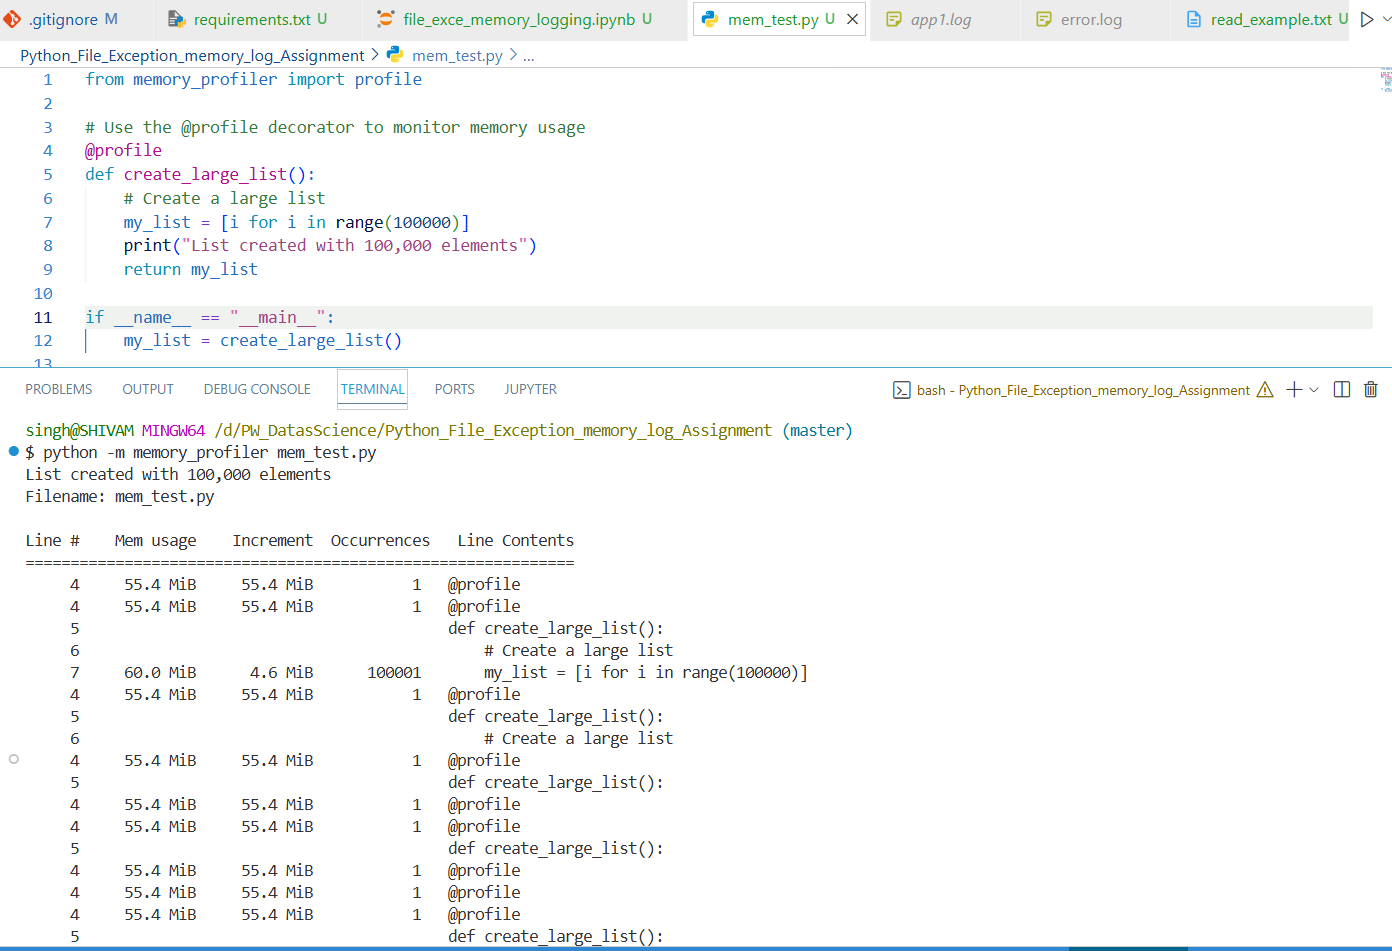

In [23]:
# 17. Write a Python program to create and write a list of numbers to a file, one number per line.

# List of numbers
numbers = [10, 20, 30, 40, 50]

# File to write to
filename = "numbers.txt"

try:
    # Open the file in write mode
    with open(filename, "w") as file:
        for number in numbers:
            file.write(f"{number}\n")  # Write each number on a new line
    print(f"Numbers have been written to '{filename}' successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

Numbers have been written to 'numbers.txt' successfully.


In [ ]:
# 18. How would you implement a basic logging setup that logs to a file with rotation after 1MB?
import logging
from logging.handlers import RotatingFileHandler

# Remove any previously configured handlers
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# Create a rotating file handler
handler = RotatingFileHandler(
    "rotate.log",       # Log file name
    maxBytes=1_000_000,  # 1 MB
    backupCount=3        # Keep up to 3 backup files
)

# Configure logging
logging.basicConfig(
    level=logging.DEBUG,
    handlers=[handler],
    format="%(asctime)s - %(levelname)s - %(message)s"
)

# Test logging
for i in range(10000):
    logging.info(f"Log message number {i}")

In [27]:
# 19. Write a program that handles both IndexError and KeyError using a try-except block.

my_list = [1, 2, 3]
my_dict = {"a": 10, "b": 20}

try:
    # Attempt to access an invalid index in the list
    print("Accessing list index 5:", my_list[5])
    
    # Attempt to access a non-existent key in the dictionary
    print("Accessing dictionary key 'c':", my_dict["c"])

except IndexError:
    print("Error: List index out of range.")

except KeyError:
    print("Error: Key does not exist in the dictionary.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")


Error: List index out of range.


In [28]:
# 20.  How would you open a file and read its contents using a context manager in Python?

filename = "example.txt"

# Using a context manager to open and read the file
try:
    with open(filename, "r") as file:
        content = file.read()  # Read the entire file content
        print(content)
except FileNotFoundError:
    print(f"Error: The file '{filename}' does not exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Hello, this is a test string for file write.
This line will be added in example file at the end.
Another new line.



In [29]:
# 21.  Write a Python program that reads a file and prints the number of occurrences of a specific word.

filename = "example.txt"
word_to_count = "file"  # Word to search for

try:
    with open(filename, "r") as file:
        content = file.read()  # Read entire file content
        
    # Count occurrences (case-sensitive)
    count = content.count(word_to_count)
    print(f"The word '{word_to_count}' occurs {count} times in the file.")

except FileNotFoundError:
    print(f"Error: The file '{filename}' does not exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


The word 'file' occurs 2 times in the file.


In [30]:
# 22. How can you check if a file is empty before attempting to read its contents?

import os

filename = "empty_file.txt"

if os.path.exists(filename):
    if os.path.getsize(filename) > 0:
        with open(filename, "r") as file:
            content = file.read()
            print(content)
    else:
        print(f"The file '{filename}' is empty.")
else:
    print(f"The file '{filename}' does not exist.")


The file 'empty_file.txt' is empty.


In [31]:
# 23. Write a Python program that writes to a log file when an error occurs during file handling.

import logging

# Remove any previously configured handlers
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# Configure logging
logging.basicConfig(
    filename="file_errors.log",  # Log file
    filemode="a",                # Append to existing log
    level=logging.ERROR,         # Only log errors and above
    format="%(asctime)s - %(levelname)s - %(message)s"
)

filename = "example10.txt"

try:
    # Attempt to open and read the file
    with open(filename, "r") as file:
        content = file.read()
        print(content)

except FileNotFoundError as e:
    logging.error(f"FileNotFoundError: {e}")
    print(f"Error: The file '{filename}' does not exist. Check log for details.")

except PermissionError as e:
    logging.error(f"PermissionError: {e}")
    print(f"Error: Permission denied for '{filename}'. Check log for details.")

except Exception as e:
    logging.error(f"Unexpected error: {e}")
    print("An unexpected error occurred. Check log for details.")


Error: The file 'example10.txt' does not exist. Check log for details.
